# AIRBNB Hosts: Need to knows 

This project aims to analyze airbnb data in Seattle to provide airbnb hosts a general picture about what airbnb data says.
There are three questions I am trying to explore within this project:

* How prices changes according to time and neighborhood?
* Which factors helps us to predict the price?
* Which factors helps us to predict the customer satisfaction?

This notebook consists of three parts. In the first part, I desvribed the data to understand it and to answer our first question.The second part includes the prediction of prices adressing second question and the last part focuses on predicting cunstomer satisfaction adressing last research question.

In this project I hope to help airbnb hosts who are trying to decide prices and improve their guests' satisfaction.


## Part 1 Understanding the Data
This is the first part of the project which aims to analyze Seattle airbnb data. 
This script focuses on understanding the data set.
You can access the data set from this adress https://www.kaggle.com/airbnb/seattle/data
### Data sets
Airbnb data consists of 3 seperate data sets: Calender data, Listing data and revies data.
In this project I only used Calendar and Listing data. 

#### Calender Data

In [2]:
##Importing the related libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


In [3]:
##Importing calendar data
Calendar = pd.read_csv("C:\kod\calendar.csv")
Calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
Calendar.shape[0]

1393570

As seen in the table above, calender data consists of 4 columns and 1393570 rows. There are 3818 distinct linstin in the data set. The first column is id, the second column is date, the third column is the availability of the place consist of two values (True of false) and 4th column is price. However in price data there are $ signs. It is a good practice to check the data types and missing data before statring any analysis.  

In [5]:
#variable types
Calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [6]:
#Missing data
Calendar.isnull().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

When we examine the data types, date, availability and price columns are object type. We are going to change date as a date time and price as int 64. 

In [7]:
# Converting date column to date and time 
# You need datetime library to do this (we imported this in the first cell)
Calendar["date"]=pd.to_datetime(Calendar["date"],format='%Y-%m-%d')
Calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [9]:
#Price values are also object type. To change it as integer we first need to delete dolar sign
Calendar['price'] = Calendar['price'].str.replace('$', '')
Calendar['price'] = pd.to_numeric(Calendar['price'], errors='coerce')
Calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [10]:
Calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [11]:
Calendar2= Calendar.dropna("rows")
Calendar2.shape[0]

933845

In [12]:
Calendar2[["price"]].describe()

,price
count,933845.000000
mean,137.192227
std,101.243661
min,10.000000
25%,75.000000
50%,109.000000
75%,160.000000
max,999.000000


As in the table, the mean airbnb price is 137. Min price is 10 and maximum price is 999

In [13]:
a=[Calendar2.groupby("listing_id").std()==0][0].sum()
b=[Calendar2.groupby("listing_id").std()!=0][0].sum()
print("The number of places that does not change their prices :", a[0],"\nThe number of places that change their prices :",b[0],
     "\nThe number of unavailable places through the year :", 3818-a[0]-b[0])

The number of places that does not change their prices : 1600 
The number of places that change their prices : 2122 
The number of unavailable places through the year : 96


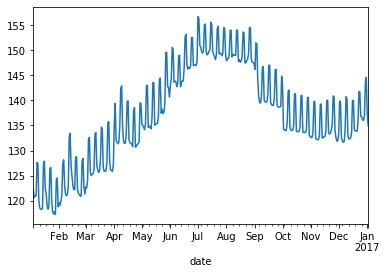

In [73]:
[Calendar.groupby("date")["price"].mean()][0].plot(kind="line")

#### Listing Data

In [14]:
##Importing listing data
Listing = pd.read_csv("C:\kod\listings.csv")
Listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [15]:
##Descriptive stats
Listing.shape[0]

3818

In [16]:
Listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Listing data has 92 columns and 3818 rows. 

In order to make data more understandable I selected variables I am planning to use in further analysis and divided data into three sets to make data wragling more managable. There are three data sets below: Num_dat: numeric variables; Bool_dat: boolien variables; srt_dat: string variables

In [17]:
#Numeric data
Num_Dat= Listing[['id','host_response_rate','latitude', 'longitude','accommodates','bathrooms', 'bedrooms', 
        'beds', 'price' ,'security_deposit','cleaning_fee','minimum_nights','maximum_nights','review_scores_rating',
        'review_scores_cleanliness','review_scores_communication','review_scores_location', 'review_scores_value', 
                  'reviews_per_month']]

In [18]:
Num_Dat.dtypes

id                               int64
host_response_rate              object
latitude                       float64
longitude                      float64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                           object
security_deposit                object
cleaning_fee                    object
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [19]:
Num_Dat[['host_response_rate','price','security_deposit','cleaning_fee']]

,host_response_rate,price,security_deposit,cleaning_fee
0,96%,$85.00,NaN,NaN
1,98%,$150.00,$100.00,$40.00
2,67%,$975.00,"$1,000.00",$300.00
3,NaN,$100.00,NaN,NaN
4,100%,$450.00,$700.00,$125.00
...,...,...,...,...
3813,99%,$359.00,NaN,$230.00
3814,100%,$79.00,$500.00,$50.00
3815,NaN,$93.00,$250.00,$35.00
3816,100%,$99.00,$300.00,$45.00


As ve can see, 'host_response_rate','price','security_deposit','cleaning_fee' variables are object type. There are $ and percent signs. we need to delete them and convert these values to numeric values 

In [20]:
##deleting signs and converting data type to float
Num_Dat['price'] = Num_Dat['price'].str.replace('$', '')
Num_Dat['price'] = pd.to_numeric(Num_Dat['price'], errors='coerce')

Num_Dat['security_deposit'] = Num_Dat['security_deposit'].str.replace('$', '')
Num_Dat['security_deposit'] = pd.to_numeric(Num_Dat['security_deposit'], errors='coerce')

Num_Dat['cleaning_fee'] = Num_Dat['cleaning_fee'].str.replace('$', '')
Num_Dat['cleaning_fee'] = pd.to_numeric(Num_Dat['cleaning_fee'], errors='coerce')

Num_Dat['host_response_rate']=Num_Dat['host_response_rate'].str.replace('%', '')
Num_Dat['host_response_rate']=pd.to_numeric(Num_Dat['host_response_rate'], errors='coerce')


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [21]:
Num_Dat[['host_response_rate','price','security_deposit','cleaning_fee']].dtypes

host_response_rate    float64
price                 float64
security_deposit      float64
cleaning_fee          float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229D82E9BC8>,
      dtype=object)

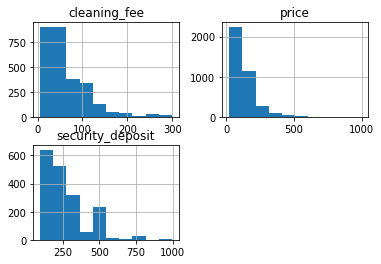

In [22]:
#Graphs prices
Num_Dat[['price','security_deposit','cleaning_fee']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229D2C1E808>,
      dtype=object)

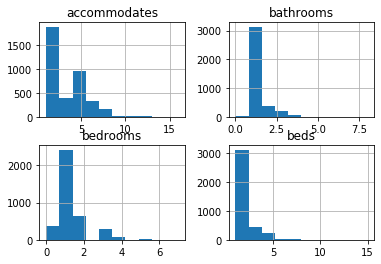

In [23]:
#graphs properties
Num_Dat[['accommodates','bathrooms', 'bedrooms', 'beds',]].hist()

In [24]:
##Boolean data
Bool_Dat=Listing[['id','host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
                 'require_guest_profile_picture','require_guest_phone_verification']]

In [25]:
Bool_Dat.head()

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,require_guest_profile_picture,require_guest_phone_verification
0,241032,f,t,t,t,f,f
1,953595,t,t,t,t,t,t
2,3308979,f,t,t,t,f,f
3,7421966,f,t,t,t,f,f
4,278830,f,t,t,t,f,f


In [26]:
Bool_Dat.dtypes

id                                   int64
host_is_superhost                   object
host_has_profile_pic                object
host_identity_verified              object
is_location_exact                   object
require_guest_profile_picture       object
require_guest_phone_verification    object
dtype: object

We need to convert f and t to 1 and 0s

In [27]:
#Converting f and t values to 0 and 1 respectively
Bool_Dat.loc[Bool_Dat.host_is_superhost == "f","host_is_superhost"] = 0
Bool_Dat.loc[Bool_Dat.host_is_superhost == "t","host_is_superhost"] = 1

Bool_Dat.loc[Bool_Dat.host_has_profile_pic == "f","host_has_profile_pic"] = 0
Bool_Dat.loc[Bool_Dat.host_has_profile_pic == "t","host_has_profile_pic"] = 1

Bool_Dat.loc[Bool_Dat.host_has_profile_pic == "f","host_has_profile_pic"] = 0
Bool_Dat.loc[Bool_Dat.host_has_profile_pic == "t","host_has_profile_pic"] = 1

Bool_Dat.loc[Bool_Dat.host_identity_verified == "f","host_identity_verified"] = 0
Bool_Dat.loc[Bool_Dat.host_identity_verified == "t","host_identity_verified"] = 1

Bool_Dat.loc[Bool_Dat.is_location_exact == "f","is_location_exact"] = 0
Bool_Dat.loc[Bool_Dat.is_location_exact == "t","is_location_exact"] = 1

Bool_Dat.loc[Bool_Dat.require_guest_profile_picture == "f","require_guest_profile_picture"] = 0
Bool_Dat.loc[Bool_Dat.require_guest_profile_picture == "t","require_guest_profile_picture"] = 1

Bool_Dat.loc[Bool_Dat.require_guest_phone_verification == "f","require_guest_phone_verification"] = 0
Bool_Dat.loc[Bool_Dat.require_guest_phone_verification == "t","require_guest_phone_verification"] = 1



C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [28]:
Bool_Dat.head()

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,require_guest_profile_picture,require_guest_phone_verification
0,241032,0,1,1,1,0,0
1,953595,1,1,1,1,1,1
2,3308979,0,1,1,1,0,0
3,7421966,0,1,1,1,0,0
4,278830,0,1,1,1,0,0


In [34]:
#Sting data
Str_Dat=Listing[['id','neighbourhood_group_cleansed','property_type','cancellation_policy']]
Str_Dat.head()

,id,neighbourhood_group_cleansed,property_type,cancellation_policy
0,241032,Queen Anne,Apartment,moderate
1,953595,Queen Anne,Apartment,strict
2,3308979,Queen Anne,House,strict
3,7421966,Queen Anne,Apartment,flexible
4,278830,Queen Anne,House,strict


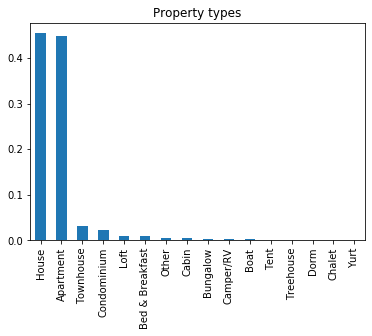

In [35]:
##Graph 1
p_types = Str_Dat['property_type'].value_counts()

(p_types/Str_Dat.shape[0]).plot(kind="bar");
plt.title("Property types");


As seen in the graph most common property types are house and apartment. So we can combine othey types and name as "other" to made data more managable

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


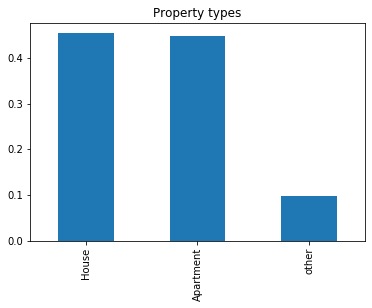

In [36]:
Str_Dat["property_type"].loc[(Str_Dat["property_type"] != "House" ) & (Str_Dat["property_type"] !="Apartment")] ="other"
p_types = Str_Dat['property_type'].value_counts()

(p_types/Str_Dat.shape[0]).plot(kind="bar");
plt.title("Property types");

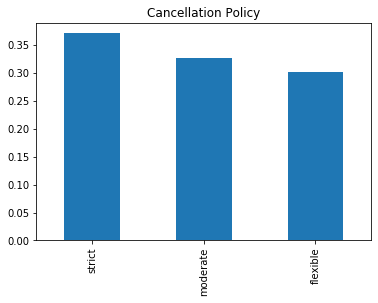

In [37]:
##Graph 2
c_pol = Str_Dat["cancellation_policy"].value_counts()
(c_pol/Str_Dat.shape[0]).plot(kind="bar");
plt.title("Cancellation Policy");

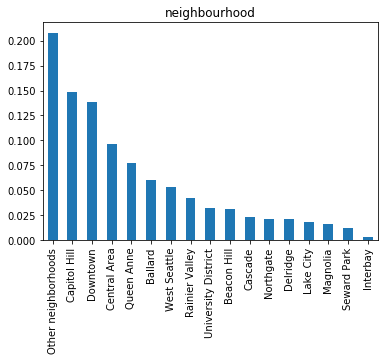

In [38]:
##Graph 3
neigb = Str_Dat["neighbourhood_group_cleansed"].value_counts()

(neigb/Str_Dat.shape[0]).plot(kind="bar");
plt.title("neighbourhood");

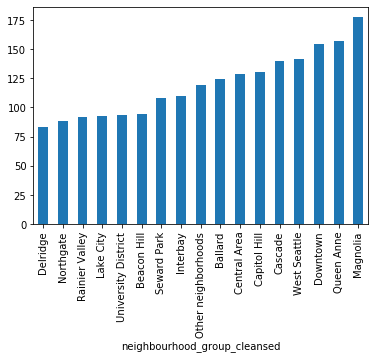

In [240]:
#Neighborhood vs price
NP=Num_Dat.merge(Str_Dat,left_on='id', right_on='id')
#mean prices in each neighborhood
[NP.groupby("neighbourhood_group_cleansed")["price"].mean()][0].sort_values().plot(kind="bar")

### Preparing data for further analysis
This part consists of two parts:
* Selecting Variables
* Creating dummy variables
* Combining data sets

This data set will be used in further analysis

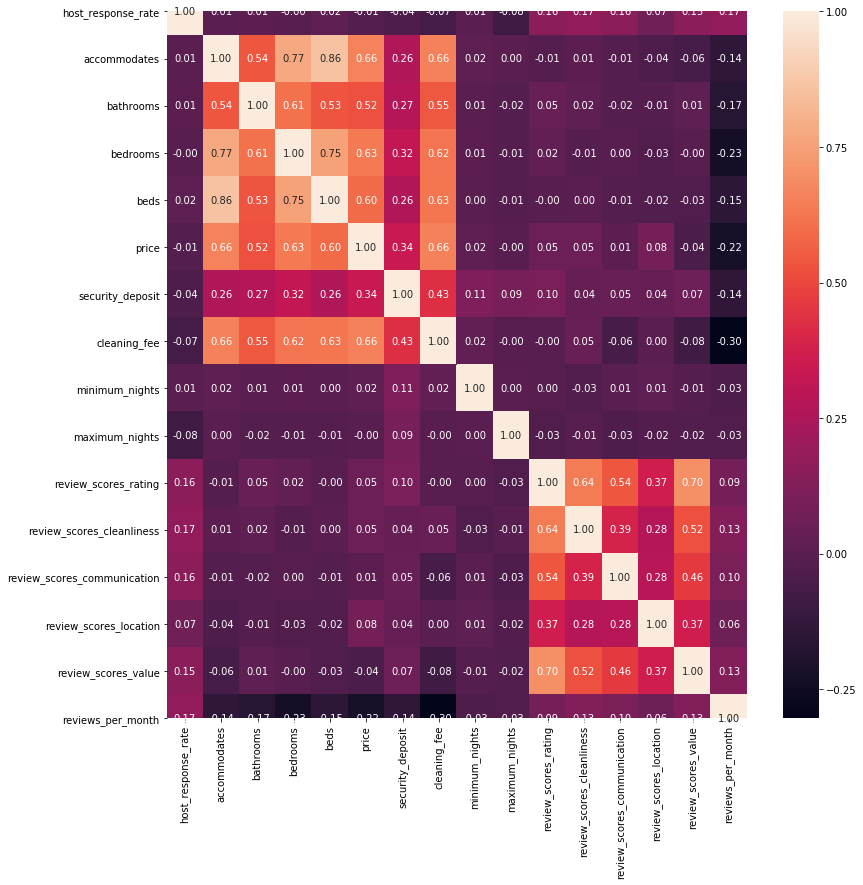

In [55]:
## Lets have a look at the correlations betweeen price and other numeric variables
import seaborn as sns
nd=Num_Dat[['host_response_rate','accommodates','bathrooms', 'bedrooms', 
        'beds', 'price' ,'security_deposit','cleaning_fee','minimum_nights','maximum_nights','review_scores_rating',
        'review_scores_cleanliness','review_scores_communication','review_scores_location', 'review_scores_value', 
                  'reviews_per_month']]
ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(nd.corr(), annot=True, fmt=".2f");

The heat map above shows us there are positive and small to medium correlations between price and number of people a place accomodates, bathrooms, bedrooms, beds,security deposit and cleaning fee. There is a negative correlation between price and reviews per month. As cleaning fee is included in the price we are going to exclue this variable and use remaining ones

In [39]:
nd=Num_Dat[["id",'accommodates','bathrooms', 'bedrooms','beds', 'price','reviews_per_month']]
nd.head()
#We are going to use these variables in the further analysis

,id,accommodates,bathrooms,bedrooms,beds,price,reviews_per_month
0,241032,4,1.0,1.0,1.0,85.0,4.07
1,953595,4,1.0,1.0,1.0,150.0,1.48
2,3308979,11,4.5,5.0,7.0,975.0,1.15
3,7421966,3,1.0,0.0,2.0,100.0,NaN
4,278830,6,2.0,3.0,3.0,450.0,0.89


In [40]:
#Lets have a look at missing values
nd.isnull().sum()

id                     0
accommodates           0
bathrooms             16
bedrooms               6
beds                   1
price                  1
reviews_per_month    627
dtype: int64

Predictive models does not work with missing values. There are 627 missing value in reviews variale. I am going to impute these values 

In [41]:
nd[["reviews_per_month"]]=nd[["reviews_per_month"]].fillna(method='ffill')

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
nd.isnull().sum()

id                    0
accommodates          0
bathrooms            16
bedrooms              6
beds                  1
price                 1
reviews_per_month     0
dtype: int64

In [43]:
Bool_Dat.head()
#Boolien data is ready for the further analysis

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,require_guest_profile_picture,require_guest_phone_verification
0,241032,0,1,1,1,0,0
1,953595,1,1,1,1,1,1
2,3308979,0,1,1,1,0,0
3,7421966,0,1,1,1,0,0
4,278830,0,1,1,1,0,0


In [119]:
Str_Dat.head()
#we need dummy coding for this variable

,id,neighbourhood_group_cleansed,property_type,cancellation_policy
0,241032,Queen Anne,Apartment,moderate
1,953595,Queen Anne,Apartment,strict
2,3308979,Queen Anne,House,strict
3,7421966,Queen Anne,Apartment,flexible
4,278830,Queen Anne,House,strict


In [44]:
## dummy coding
temp=pd.get_dummies(Str_Dat[["property_type","cancellation_policy"]])
temp.head()

,property_type_Apartment,property_type_House,property_type_other,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,0,0,0,1,0
1,1,0,0,0,0,1
2,0,1,0,0,0,1
3,1,0,0,1,0,0
4,0,1,0,0,0,1


In [45]:
#combining id and dummy variables
StrD= pd.concat([temp.reset_index(drop=True),Str_Dat[["id"]].reset_index(drop=True)],axis=1)
StrD

,property_type_Apartment,property_type_House,property_type_other,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,id
0,1,0,0,0,1,0,241032
1,1,0,0,0,0,1,953595
2,0,1,0,0,0,1,3308979
3,1,0,0,1,0,0,7421966
4,0,1,0,0,0,1,278830
...,...,...,...,...,...,...,...
3813,0,1,0,0,0,1,8101950
3814,1,0,0,0,1,0,8902327
3815,0,1,0,0,1,0,10267360
3816,0,0,1,0,1,0,9604740


In [46]:
##Merging data files
Final_Data=nd.merge(StrD,left_on='id', right_on='id')
Final_Data=Final_Data.merge(Bool_Dat,left_on='id', right_on='id')
Final_Data.head()

,id,accommodates,bathrooms,bedrooms,beds,price,reviews_per_month,property_type_Apartment,property_type_House,property_type_other,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,require_guest_profile_picture,require_guest_phone_verification
0,241032,4,1.0,1.0,1.0,85.0,4.07,1,0,0,0,1,0,0,1,1,1,0,0
1,953595,4,1.0,1.0,1.0,150.0,1.48,1,0,0,0,0,1,1,1,1,1,1,1
2,3308979,11,4.5,5.0,7.0,975.0,1.15,0,1,0,0,0,1,0,1,1,1,0,0
3,7421966,3,1.0,0.0,2.0,100.0,1.15,1,0,0,1,0,0,0,1,1,1,0,0
4,278830,6,2.0,3.0,3.0,450.0,0.89,0,1,0,0,0,1,0,1,1,1,0,0


In [47]:
#Dropping rows with missing values
Final_Data=Final_Data.dropna(axis="rows")
Final_Data.isnull().sum()

id                                  0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
price                               0
reviews_per_month                   0
property_type_Apartment             0
property_type_House                 0
property_type_other                 0
cancellation_policy_flexible        0
cancellation_policy_moderate        0
cancellation_policy_strict          0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
is_location_exact                   0
require_guest_profile_picture       0
require_guest_phone_verification    0
dtype: int64

## Part 2 Predicting Price
This is the second part of the project which aims to analyze Seattle airbnb data. 
This part focuses on predicting price using airbnb listing data.
 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [50]:
X = Final_Data.drop(columns=["price","id"])
y = Final_Data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
test_score=r2_score(y_test,lm_model.predict(X_test))
train_score=r2_score(y_train,lm_model.predict(X_train))
print("The r-squared score for the test data is", test_score, "\nThe r-squared score for the training data is", train_score)

The r-squared score for the test data is 0.5442092578570571 
The r-squared score for the training data is 0.5043157484904683


In [52]:
def coef_weights(coefficients, X_train):
  
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

In [93]:
coef_df

,est_int,coefs,abs_coefs
1,bathrooms,26.984848,26.984848
2,bedrooms,25.558081,25.558081
12,host_has_profile_pic,-22.479869,22.479869
0,accommodates,16.419203,16.419203
6,property_type_House,-13.487539,13.487539
11,host_is_superhost,11.153312,11.153312
5,property_type_Apartment,10.059117,10.059117
15,require_guest_profile_picture,9.998903,9.998903
7,property_type_other,9.504752,9.504752
10,cancellation_policy_strict,4.021539,4.021539


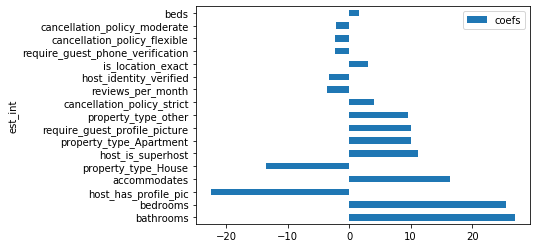

In [95]:
#Plotting predictors of price
ax=coef_df.plot.barh(x="est_int", y="coefs")

## Part 3 Predicting Satisfaction
This is the third part of the project which aims to analyze Seattle airbnb data. 
This script focuses on predicting customer satisfaction

In [113]:
##Selecting variables
nd2=Num_Dat[["id",'host_response_rate','accommodates','bathrooms', 'bedrooms', 
        'beds', 'price' ,'minimum_nights','maximum_nights','review_scores_rating',
        'review_scores_cleanliness','review_scores_communication','review_scores_location', 'review_scores_value' ]]

In [114]:
Final_Data2=nd2.merge(StrD,left_on='id', right_on='id')
Final_Data2=Final_Data2.merge(Bool_Dat,left_on='id', right_on='id')
Final_Data2.head()

,id,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,review_scores_rating,...,property_type_other,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,require_guest_profile_picture,require_guest_phone_verification
0,241032,96.0,4,1.0,1.0,1.0,85.0,1,365,95.0,...,0,0,1,0,0,1,1,1,0,0
1,953595,98.0,4,1.0,1.0,1.0,150.0,2,90,96.0,...,0,0,0,1,1,1,1,1,1,1
2,3308979,67.0,11,4.5,5.0,7.0,975.0,4,30,97.0,...,0,0,0,1,0,1,1,1,0,0
3,7421966,NaN,3,1.0,0.0,2.0,100.0,1,1125,NaN,...,0,1,0,0,0,1,1,1,0,0
4,278830,100.0,6,2.0,3.0,3.0,450.0,1,1125,92.0,...,0,0,0,1,0,1,1,1,0,0


In [115]:
Final_Data2.isnull().sum()

id                                    0
host_response_rate                  523
accommodates                          0
bathrooms                            16
bedrooms                              6
beds                                  1
price                                 1
minimum_nights                        0
maximum_nights                        0
review_scores_rating                647
review_scores_cleanliness           653
review_scores_communication         651
review_scores_location              655
review_scores_value                 656
property_type_Apartment               0
property_type_House                   0
property_type_other                   0
cancellation_policy_flexible          0
cancellation_policy_moderate          0
cancellation_policy_strict            0
host_is_superhost                     2
host_has_profile_pic                  2
host_identity_verified                2
is_location_exact                     0
require_guest_profile_picture         0


In [116]:
Final_Data3=Final_Data2.dropna(axis="rows")
Final_Data3.isnull().sum()

id                                  0
host_response_rate                  0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating                0
review_scores_cleanliness           0
review_scores_communication         0
review_scores_location              0
review_scores_value                 0
property_type_Apartment             0
property_type_House                 0
property_type_other                 0
cancellation_policy_flexible        0
cancellation_policy_moderate        0
cancellation_policy_strict          0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
is_location_exact                   0
require_guest_profile_picture       0
require_guest_phone_verification    0
dtype: int64

In [122]:
X = Final_Data3.drop(columns=['review_scores_rating',"review_scores_value","host_has_profile_pic","id"])
y = Final_Data3['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [123]:
test_score=r2_score(y_test,lm_model.predict(X_test))
train_score=r2_score(y_train,lm_model.predict(X_train))
print("The r-squared score for the test data is", test_score, "\nThe r-squared score for the training data is", train_score)

The r-squared score for the test data is 0.437855295682414 
The r-squared score for the training data is 0.5811501898826538


In [124]:
coef_df = coef_weights(lm_model.coef_, X_train)

In [125]:
coef_df

,est_int,coefs,abs_coefs
9,review_scores_communication,4.194439,4.194439
8,review_scores_cleanliness,3.615534,3.615534
10,review_scores_location,1.599326,1.599326
17,host_is_superhost,1.008095,1.008095
18,host_identity_verified,0.845827,0.845827
14,cancellation_policy_flexible,0.540010,0.540010
20,require_guest_profile_picture,-0.481179,0.481179
15,cancellation_policy_moderate,-0.404484,0.404484
13,property_type_other,0.387730,0.387730
11,property_type_Apartment,-0.360688,0.360688


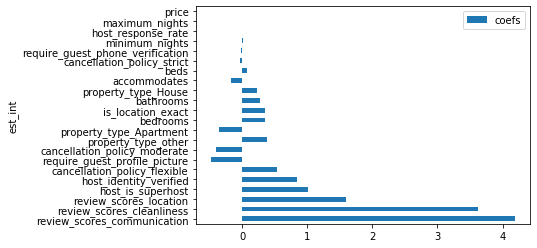

In [126]:
ax=coef_df.plot.barh(x="est_int", y="coefs")